<a href="https://colab.research.google.com/github/laviniaflorentina/neural_networks_dissertation/blob/master/experiment1_baseline_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Downloads

In [0]:
import os.path
from IPython.display import clear_output

if not os.path.exists("data/train_minist.npz"):
  !wget https://github.com/laviniaflorentina/neural_networks_dissertation/raw/master/data/train_minist.npz
  clear_output(wait=True)

if not os.path.exists("validation_minist.npz"):
  !wget https://github.com/laviniaflorentina/neural_networks_dissertation/raw/master/data/validation_minist.npz
  clear_output(wait=True)

if not os.path.exists("test_minist.npz"):
  !wget https://github.com/laviniaflorentina/neural_networks_dissertation/raw/master/data/test_minist.npz
  clear_output(wait=True)

!ls

sample_data  test_minist.npz  train_minist.npz	validation_minist.npz


### Imports

In [0]:
import numpy as np
from IPython.display import Image
import matplotlib.pyplot as plt
import random
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
from sklearn.utils.multiclass import unique_labels
import pandas as pd
from keras.utils.vis_utils import plot_model
from keras.preprocessing.image import ImageDataGenerator



def plot_train(train_history, train=True, validation=True, acc_name='Model accuracy', loss_name='Model loss'):
  legend = []
  
  fig, ax = plt.subplots()
  
  fig.tight_layout()
  fig = plt.gcf()
  fig.set_size_inches(18.5, 10.5)
  #fig.savefig(acc_name+".png", dpi=100)
  
  # summarize history for accuracy
  if train:
    plt.plot(history.history['acc'])
    legend.append('train')
    
  if validation:
    plt.plot(history.history['val_acc'])
    legend.append('validation')
    
  plt.grid()
  plt.title(acc_name)
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(legend, loc='upper left')
  plt.xticks((np.arange(len(history.history["acc"]))), 
             (np.arange(len(history.history["acc"]))+1))
  plt.show()
  
  fig.tight_layout()
  fig = plt.gcf()
  fig.set_size_inches(18.5, 10.5)
  #fig.savefig(loss_name+".png", dpi=100)
  
  legend = []
  
  # summarize history for loss
  if train:
    plt.plot(history.history['loss'])
    legend.append('train')
    
  if validation:
    plt.plot(history.history['val_loss'])
    legend.append('validation')
    
  plt.grid()
  plt.title(loss_name)
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(legend, loc='upper left')
  plt.xticks((np.arange(len(history.history["acc"]))), 
             (np.arange(len(history.history["acc"]))+1))
  plt.show()
  
  return



def global_evaluation(true_labels, predicted_labels, avg='macro'):
  f1 = f1_score(true_labels, predicted_labels, average=avg)
  precision = precision_score(true_labels, predicted_labels, average=avg)
  recall = recall_score(true_labels, predicted_labels, average=avg)
  accuracy = accuracy_score(true_labels, predicted_labels)
  
  evaluation_table = pd.DataFrame({'Metric':["F1-score", "Precision", "Recall", "Accuracy"], "Value":[f1, precision, recall, accuracy] })
  
  return evaluation_table



def micro_evaluation(true_labels, predicted_labels, labels=list(range(10)), avg=None):
  f1 = f1_score(true_labels, predicted_labels, average=avg)
  precision = precision_score(true_labels, predicted_labels, average=avg)
  recall = recall_score(true_labels, predicted_labels, average=avg)
  evaluation_table = pd.DataFrame({'Labels':labels, "precision":precision, "recall":recall, "f1":f1 })
  
  return evaluation_table




def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues,
                         image="confusion_matrix.png"):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    fig = plt.gcf()
    fig.set_size_inches(18.5, 10.5)
    fig.savefig(image, dpi=100)
    return ax

Using TensorFlow backend.


### Load Data

In [0]:
npzfile = np.load("train_minist.npz")
X_train = npzfile['arr_0']
y_train = npzfile['arr_1']

npzfile = np.load("validation_minist.npz")
X_validation = npzfile['arr_0']
y_validation = npzfile['arr_1']

npzfile = np.load("test_minist.npz")
X_test = npzfile['arr_0']
y_test = npzfile['arr_1']

print("Train",X_train.shape)
print("Valid",X_validation.shape)
print("Test ",X_test.shape)

Train (3000, 28, 28)
Valid (3000, 28, 28)
Test  (10000, 28, 28)


#### Sample

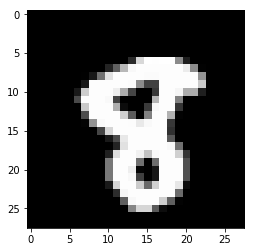

8


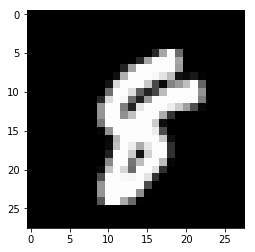

8


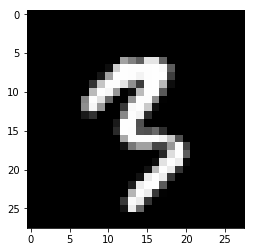

3


In [0]:
i = random.randint(0, len(X_train))
# plot image
plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))
plt.show()
# label
print(y_train[i])

# plot image
plt.imshow(X_validation[i], cmap=plt.get_cmap('gray'))
plt.show()
# label
print(y_validation[i])

# plot image
plt.imshow(X_test[i], cmap=plt.get_cmap('gray'))
plt.show()
# label
print(y_test[i])

### Baseline CNN

W0906 03:14:36.081414 140380621322112 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:66: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0906 03:14:36.115409 140380621322112 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:541: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0906 03:14:36.125379 140380621322112 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4432: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



(3000, 28, 28)
(3000, 28, 28)
(10000, 28, 28)


W0906 03:14:36.145451 140380621322112 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:190: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0906 03:14:36.146808 140380621322112 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:197: The name tf.ConfigProto is deprecated. Please use tf.compat.v1.ConfigProto instead.

W0906 03:14:39.490074 140380621322112 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4267: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0906 03:14:39.505980 140380621322112 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3733: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for 

Train on 3000 samples, validate on 3000 samples
Epoch 1/20
3000/3000 [==============================] - 3s 1ms/step - loss: 1.1923 - acc: 0.6913 - val_loss: 0.4961 - val_acc: 0.8603
Epoch 2/20
3000/3000 [==============================] - 0s 76us/step - loss: 0.3947 - acc: 0.8863 - val_loss: 0.3683 - val_acc: 0.8907
Epoch 3/20
3000/3000 [==============================] - 0s 71us/step - loss: 0.2805 - acc: 0.9210 - val_loss: 0.3102 - val_acc: 0.9070
Epoch 4/20
3000/3000 [==============================] - 0s 69us/step - loss: 0.2198 - acc: 0.9367 - val_loss: 0.2858 - val_acc: 0.9190
Epoch 5/20
3000/3000 [==============================] - 0s 70us/step - loss: 0.1809 - acc: 0.9500 - val_loss: 0.2579 - val_acc: 0.9260
Epoch 6/20
3000/3000 [==============================] - 0s 71us/step - loss: 0.1445 - acc: 0.9620 - val_loss: 0.2524 - val_acc: 0.9237
Epoch 7/20
3000/3000 [==============================] - 0s 66us/step - loss: 0.1289 - acc: 0.9680 - val_loss: 0.2275 - val_acc: 0.9347
Epoch 8/

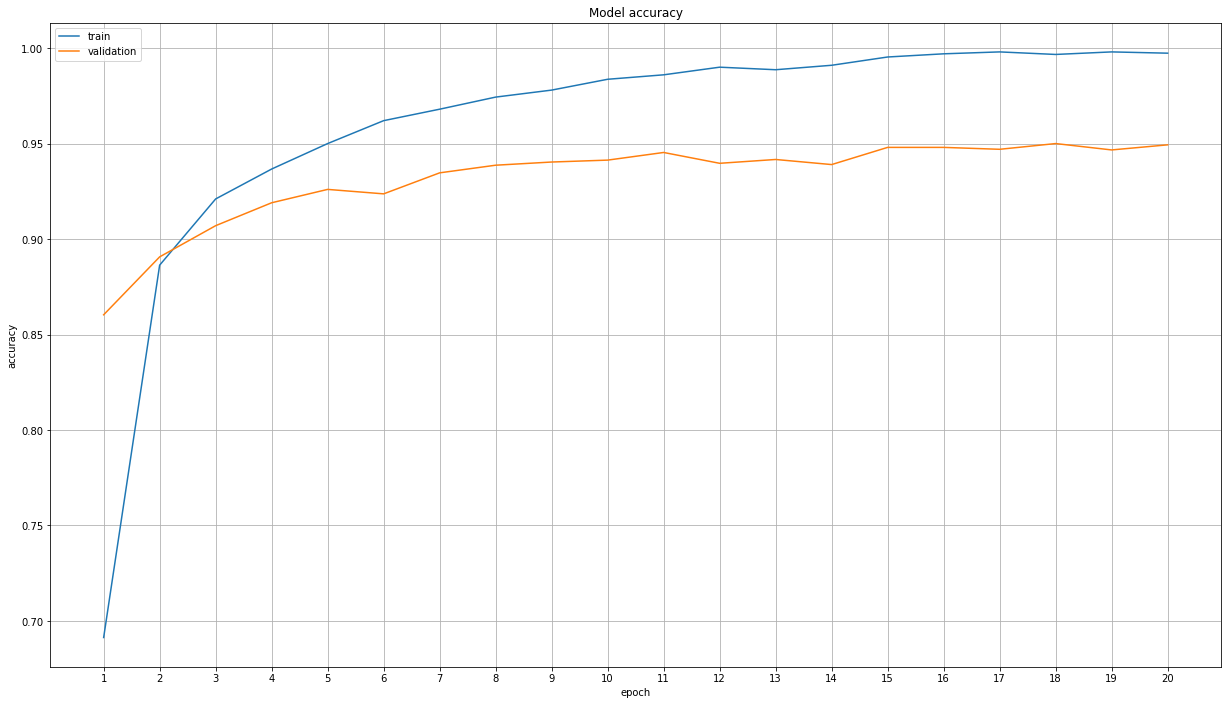

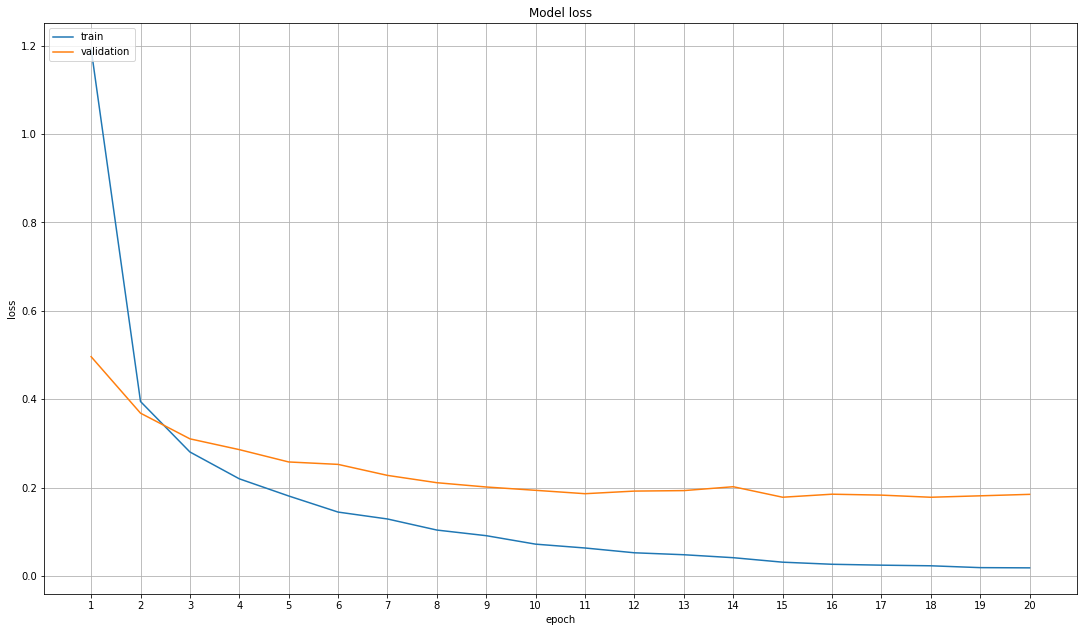

Confusion matrix, without normalization
[[ 959    0    1    0    1    1   13    1    4    0]
 [   0 1124    0    4    1    0    3    2    1    0]
 [   6    7  950   26   12    1    1   19    8    2]
 [   0    0    6  976    1   12    0    7    5    3]
 [   1    2    2    0  961    0    5    1    2    8]
 [   2    1    0    7    0  866    6    3    6    1]
 [   6    2    1    0    8   15  924    2    0    0]
 [   0   11   21    5    8    0    1  968    3   11]
 [   4    3    4   12    8   11    1    3  915   13]
 [   6    7    1    3   16    6    1    9    4  956]]
Normalized confusion matrix
[[9.78571429e-01 0.00000000e+00 1.02040816e-03 0.00000000e+00
  1.02040816e-03 1.02040816e-03 1.32653061e-02 1.02040816e-03
  4.08163265e-03 0.00000000e+00]
 [0.00000000e+00 9.90308370e-01 0.00000000e+00 3.52422907e-03
  8.81057269e-04 0.00000000e+00 2.64317181e-03 1.76211454e-03
  8.81057269e-04 0.00000000e+00]
 [5.81395349e-03 6.78294574e-03 9.20542636e-01 2.51937984e-02
  1.16279070e-02 9.689922

,Metric,Value
0,F1-score,0.959677
1,Precision,0.959800
2,Recall,0.959827
3,Accuracy,0.959900


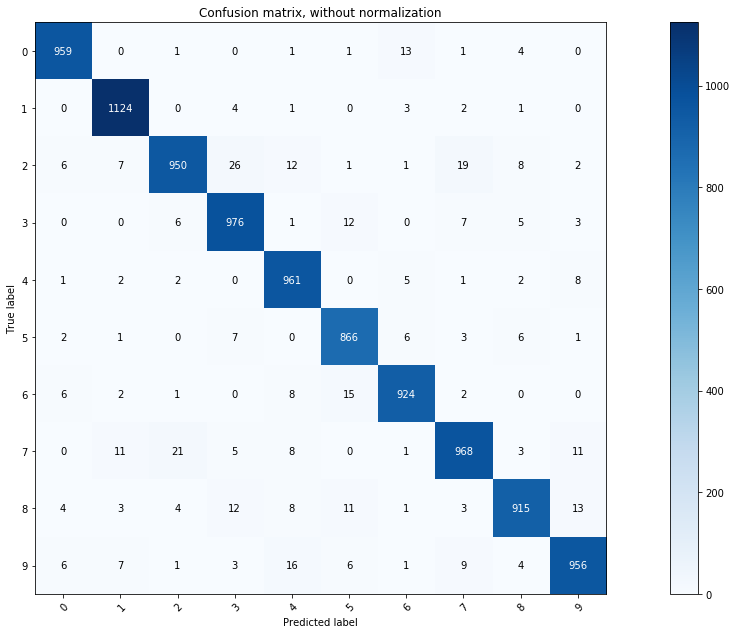

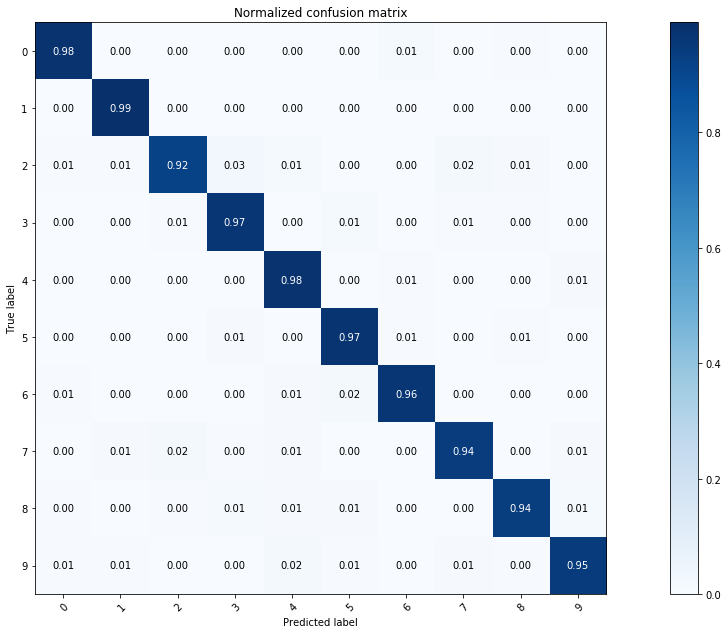

In [0]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.preprocessing.image import ImageDataGenerator
from keras import backend as K
import matplotlib.pyplot as plt
import numpy as np
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers import Flatten
import random
from IPython.display import Image
from keras.utils.vis_utils import plot_model


K.set_image_data_format('channels_first')

# fix random seed for reproducibility
seed = 7
np.random.seed(seed)


def scale_data(images, labels, number_classes=10):
  print(images.shape)
  scaled_images = images.reshape(images.shape[0], 1, images.shape[1], images.shape[2]).astype('float32')
  
  # normalize inputs from 0-255 to 0-1
  # importantfor NN - learn faster
  scaled_images = scaled_images / 255

  # one hot encode outputs
  scaled_labels = np_utils.to_categorical(labels, num_classes=number_classes)
  return scaled_images, scaled_labels


X_train_sc, y_train_sc = scale_data(images=X_train, labels=y_train, number_classes=10)
X_valid_sc, y_valid_sc = scale_data(images=X_validation, labels=y_validation, number_classes=10)
X_test_sc, _ = scale_data(images=X_test, labels=y_test, number_classes=10)

# create model
model = Sequential()
model.add(Conv2D(32, (5, 5), input_shape=X_train_sc.shape[1:], activation='relu'))      # NOTA !!!! CONVOLUTION
model.add(MaxPooling2D(pool_size=(2, 2)))     # LAYER DE MICSORARE (IA PIXELUL CU VALOARE MAXIMA)
model.add(Dropout(0.2)) #seteaza valori pe zero random din matrici
model.add(Flatten()) # face orice dimensiune intr-un vector
model.add(Dense(128, activation='relu')) # NN normal layer
model.add(Dense(y_train_sc.shape[-1], activation='softmax')) # NN normal layer
# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# model.summary()

history = model.fit(X_train_sc, y_train_sc, validation_data=(X_valid_sc, y_valid_sc), epochs=20, batch_size=200, verbose=1)

# plot history training
plot_train(train_history=history, 
           train=True, 
           validation=True)

# predicitons
y_predicted = model.predict_classes(X_test_sc)

plot_confusion_matrix(y_test, y_predicted, classes=np.array(range(10)), normalize=False, image="ex1_baseline_cnn_confusion_matrix_notnormalized.png")

plot_confusion_matrix(y_test, y_predicted, classes=np.array(range(10)), normalize=True, image="ex1_baseline_cnn_confusion_matrix_normalized.png")

baseline_cnn_global_evaluation = global_evaluation(y_test, y_predicted)

baseline_cnn_global_evaluation.to_csv("ex1_baseline_cnn_global_evaluation.csv")

baseline_cnn_global_evaluation

In [0]:
baseline_cnn_micro_evaluation = micro_evaluation(y_test, y_predicted)

baseline_cnn_micro_evaluation.to_csv("ex1_baseline_cnn_micro_evaluation.csv")

baseline_cnn_micro_evaluation

,Labels,precision,recall,f1
0,0,0.974593,0.978571,0.976578
1,1,0.971478,0.990308,0.980803
2,2,0.963489,0.920543,0.941526
3,3,0.944821,0.966337,0.955458
4,4,0.945866,0.978615,0.961962
5,5,0.949561,0.970852,0.960089
6,6,0.967539,0.964509,0.966022
7,7,0.953695,0.941634,0.947626
8,8,0.965190,0.939425,0.952133
9,9,0.961771,0.947473,0.954568


### Model diagram

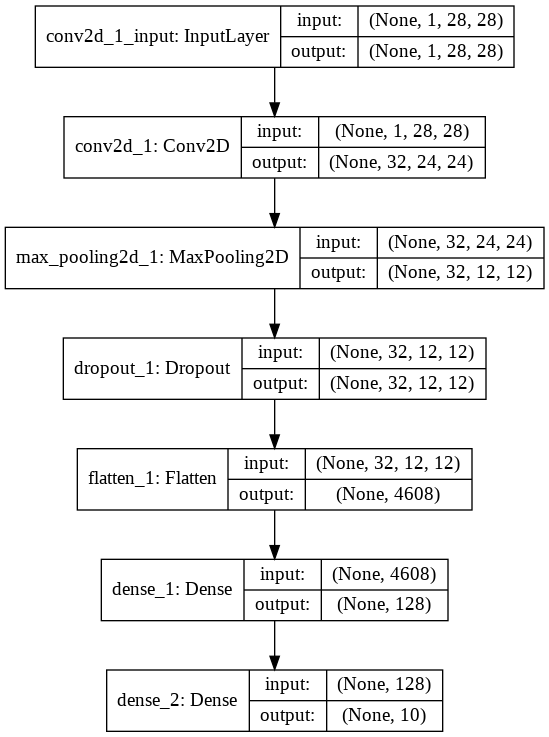

In [0]:
# image model
plot_model(model, to_file='cnn_model.png', show_shapes=True, show_layer_names=True)
Image('cnn_model.png')